# COGS 189 Find Triggers

In [1]:
import numpy as np   
import matplotlib.pyplot as plt    
import pandas as pd

# from scipy.io.wavfile import read

import os
# import mne

# import wave
# import sys
from scipy.signal import find_peaks

# Import data for one subjects
Combine data from all subjects for a selected experiment into a single data frame.

In [2]:
from glob import glob

# Specify experiment folder to read from
exp = 'exp0'

# Subject ID here essentially tracks the file 
subject_ID = 0

# Grab all data files for that experiment
data_files = glob("../data/" + exp + "/**/OpenBCI*.txt", recursive=True)

# Container for combining data from multiple files
data = pd.DataFrame()

file_path = data_files[subject_ID]
print(f'Subject{subject_ID}')
print(f'Reading {file_path}')

# Read in one subject's data
sub_data = pd.read_csv(file_path,
                   delimiter = ',', # BrainFlow files appear to use \t
                   header=4, # row number of col names
                  )

# Append a column with the subject ID (really just a proxy for the file path)
sub_data['Subject'] = subject_ID

# Concatenate into one dataframe with all files
data = pd.concat([data, sub_data])

# Display
data

Subject0
Reading ../data/exp0/OpenBCISession_2023-03-01_13-30-42/OpenBCI-RAW-2023-03-01_13-43-06.txt


,Sample Index,EXG Channel 0,EXG Channel 1,EXG Channel 2,EXG Channel 3,EXG Channel 4,EXG Channel 5,EXG Channel 6,EXG Channel 7,Accel Channel 0,...,Other.4,Other.5,Other.6,Analog Channel 0,Analog Channel 1,Analog Channel 2,Timestamp,Other.7,Timestamp (Formatted),Subject
0,1.0,12584.725032,15524.024132,-2317.138292,17950.261289,14667.952319,7234.834997,18205.361748,19735.338656,0.0,...,109.0,1.0,255.0,421.0,621.0,511.0,1.677707e+09,0.0,2023-03-01 13:43:06.580,0
1,2.0,12595.587980,15529.410902,-2316.959478,17958.352620,14691.756927,7232.622174,18216.045882,19740.792482,0.0,...,4.0,1.0,255.0,402.0,516.0,511.0,1.677707e+09,0.0,2023-03-01 13:43:06.580,0
2,3.0,12579.830000,15523.957077,-2315.327801,17950.641269,14672.221502,7231.638698,18202.008987,19733.751682,0.0,...,189.0,1.0,255.0,387.0,445.0,511.0,1.677707e+09,0.0,2023-03-01 13:43:06.580,0
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,1.0,255.0,445.0,768.0,511.0,1.677707e+09,0.0,2023-03-01 13:43:06.669,0
4,1.0,12535.305325,15492.910503,-2324.290851,17940.381818,14577.673623,7226.006058,18228.495804,19714.976217,0.0,...,110.0,1.0,255.0,423.0,622.0,511.0,1.677707e+09,0.0,2023-03-01 13:43:06.678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201703,228.0,13771.110925,14851.169568,-4500.881374,20286.398564,18994.043051,6362.066431,19783.484314,20563.046105,0.0,...,248.0,1.0,255.0,319.0,248.0,511.0,1.677708e+09,0.0,2023-03-01 13:56:32.471,0
201704,229.0,13106.638265,14606.037987,-4437.536530,19796.493029,17391.780602,6199.926877,18912.615646,19904.049623,0.0,...,248.0,1.0,255.0,319.0,248.0,511.0,1.677708e+09,0.0,2023-03-01 13:56:32.471,0
201705,230.0,13205.947066,14598.796022,-4461.385842,19756.997497,17268.086048,6227.017191,18917.823603,19923.540345,0.0,...,247.0,1.0,255.0,318.0,247.0,511.0,1.677708e+09,0.0,2023-03-01 13:56:32.476,0
201706,231.0,13902.829755,14849.157911,-4528.843406,20233.268468,18854.501111,6398.410368,19811.669864,20595.634949,0.0,...,246.0,1.0,255.0,317.0,246.0,511.0,1.677708e+09,0.0,2023-03-01 13:56:32.484,0


# Simplify Column Names

In [3]:
print(data.keys())

# Remove extra spaces from col names, and remove "Channel" as its redundant
# https://stackoverflow.com/questions/21606987/how-can-i-strip-the-whitespace-from-pandas-dataframe-headers
data = data.rename(columns=lambda x: x.strip().replace(" Channel ", ""))

print(data.keys())

Index(['Sample Index', ' EXG Channel 0', ' EXG Channel 1', ' EXG Channel 2',
       ' EXG Channel 3', ' EXG Channel 4', ' EXG Channel 5', ' EXG Channel 6',
       ' EXG Channel 7', ' Accel Channel 0', ' Accel Channel 1',
       ' Accel Channel 2', ' Other', ' Other.1', ' Other.2', ' Other.3',
       ' Other.4', ' Other.5', ' Other.6', ' Analog Channel 0',
       ' Analog Channel 1', ' Analog Channel 2', ' Timestamp', ' Other.7',
       ' Timestamp (Formatted)', 'Subject'],
      dtype='object')
Index(['Sample Index', 'EXG0', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6',
       'EXG7', 'Accel0', 'Accel1', 'Accel2', 'Other', 'Other.1', 'Other.2',
       'Other.3', 'Other.4', 'Other.5', 'Other.6', 'Analog0', 'Analog1',
       'Analog2', 'Timestamp', 'Other.7', 'Timestamp (Formatted)', 'Subject'],
      dtype='object')


# Drop unused columns

In [4]:
# data = data.drop(columns=['temp', 'time0'])
#data = data.drop(columns=['temp', 'time0', 'time1'])

drop_cols = [] # list of column labels to drop
for col in data.keys():
    # print(col)
    if 'Other' in col:
        drop_cols.append(col)
    elif 'Accel' in col:
        drop_cols.append(col)
    elif 'Timestamp (Formatted)' in col:
        drop_cols.append(col)
        
print('Columns to drop:', drop_cols)

# Remove 
data = data.drop(columns=drop_cols)

print('Remaining cols:\n', data.keys())

Columns to drop: ['Accel0', 'Accel1', 'Accel2', 'Other', 'Other.1', 'Other.2', 'Other.3', 'Other.4', 'Other.5', 'Other.6', 'Other.7', 'Timestamp (Formatted)']
Remaining cols:
 Index(['Sample Index', 'EXG0', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6',
       'EXG7', 'Analog0', 'Analog1', 'Analog2', 'Timestamp', 'Subject'],
      dtype='object')


# Plot Analog (Aux) Channels

Analog0 Min: 289.0
Analog0 Max: 341.0
Analog1 Min: 238.0
Analog1 Max: 257.0
Analog2 Min: 286.0
Analog2 Max: 755.0


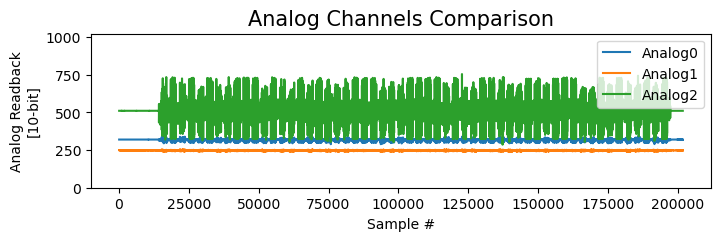

In [5]:
START_NDX = 100 # why skip initial samples?

# Make a figure to plot all analog data
plt.figure(figsize=(8,2))

for col in data.keys():
    if 'Analog' in col:
        print(f"{col} Min: {data[col][START_NDX:].min()}")
        print(f"{col} Max: {data[col][START_NDX:].max()}")
        
        # add a plot for this channel
        plt.plot(data[col][START_NDX:], label=col)


plt.title("Analog Channels Comparison", fontsize=15)
plt.legend(loc="upper right")
plt.xlabel('Sample #')
plt.ylabel('Analog Readback\n[10-bit]')
plt.ylim([0, 1023])
plt.show()

# Attempt to find the starting sample of the experiment

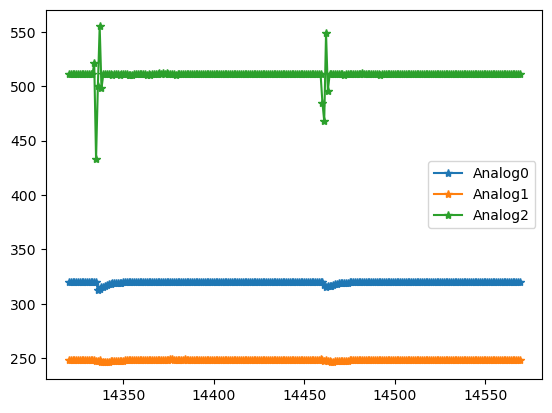

In [6]:
TARGET_NDX = 14320 # leave some room to prevent overlapping peaks
DURATION_NDX = 250*1

for ch in range(3):
    ch_name = f'Analog{ch}'
    ch_data = data[ch_name].iloc[TARGET_NDX:TARGET_NDX + DURATION_NDX]
    plt.plot(ch_data, '*-', label=ch_name)
    
plt.legend()

3250
60


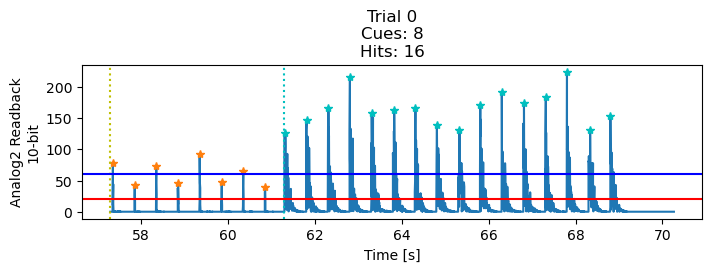

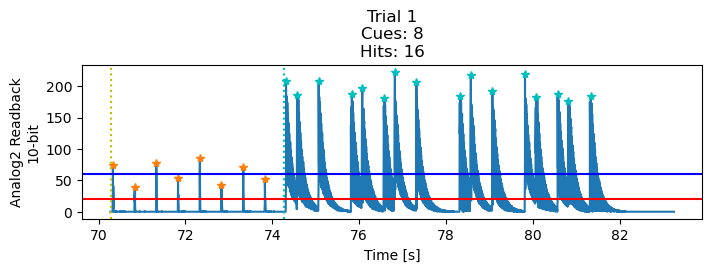

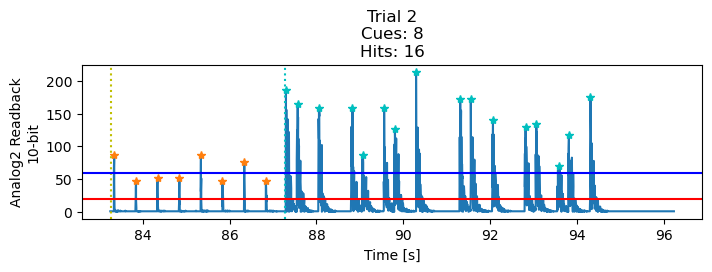

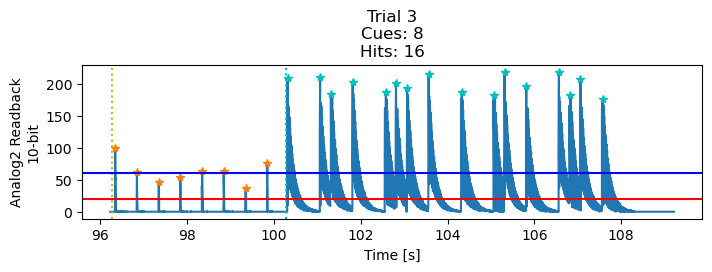

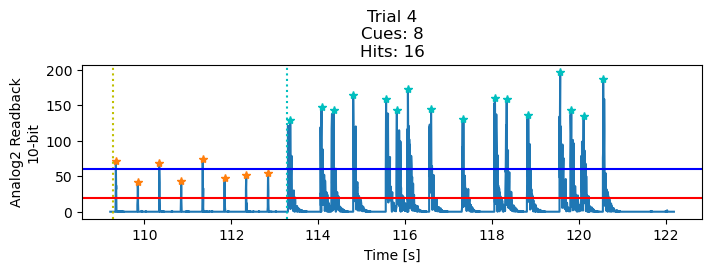

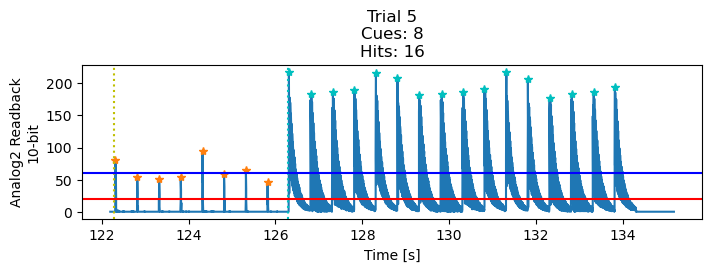

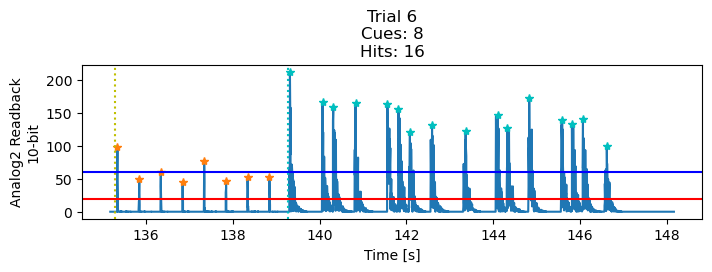

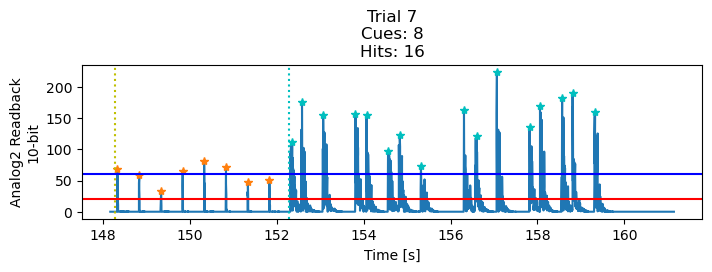

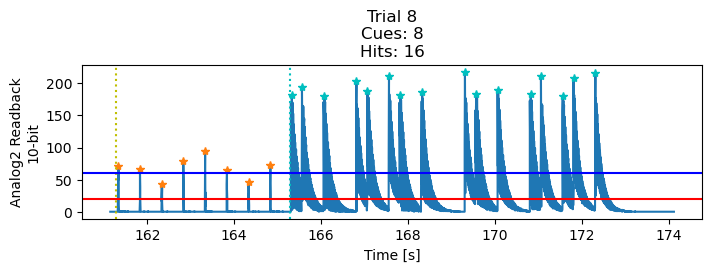

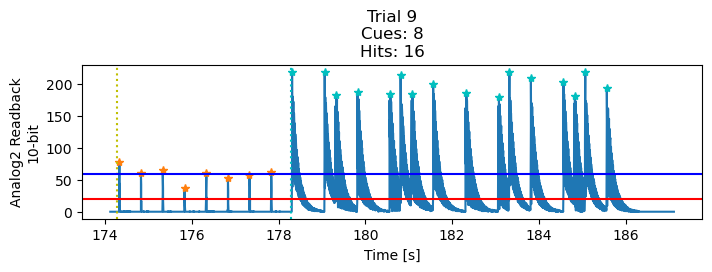

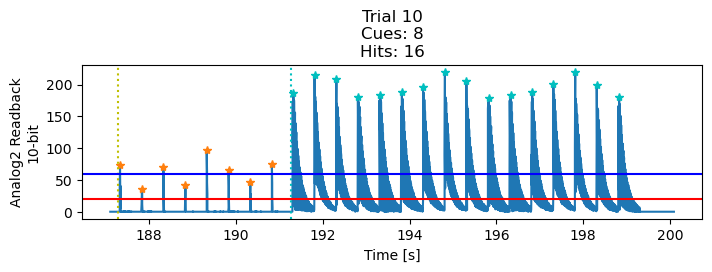

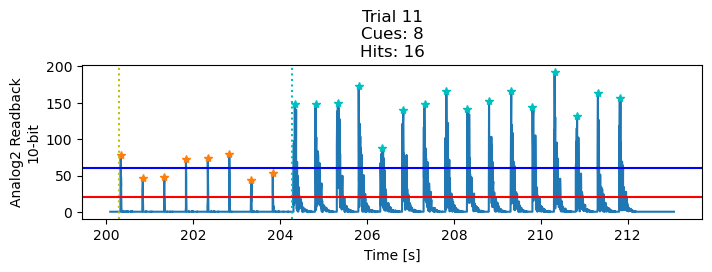

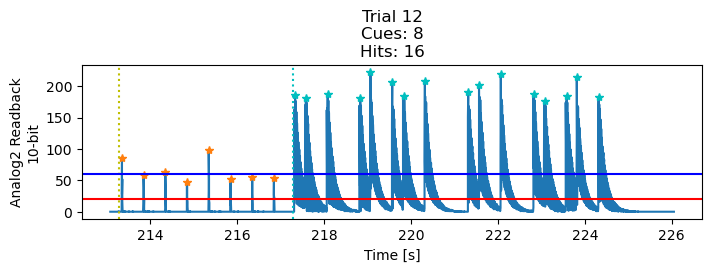

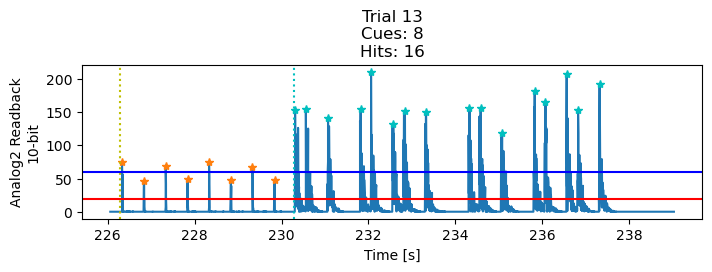

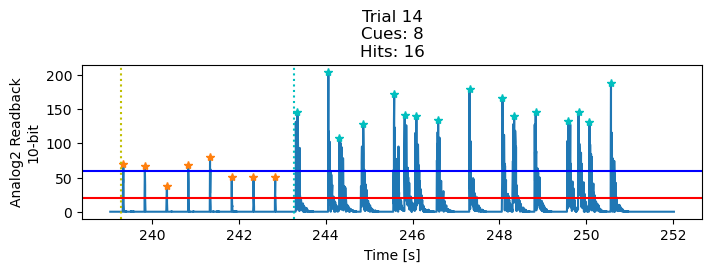

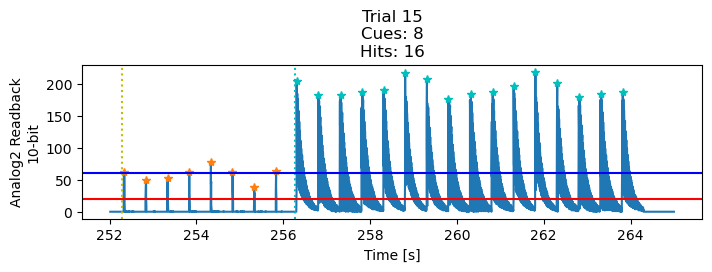

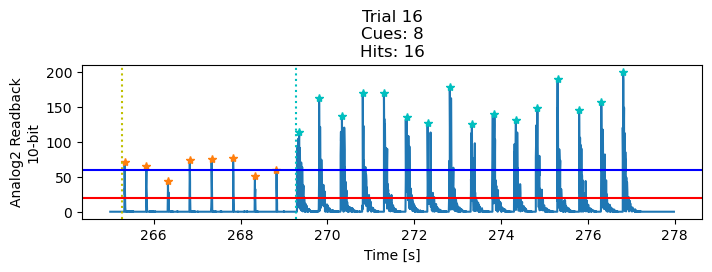

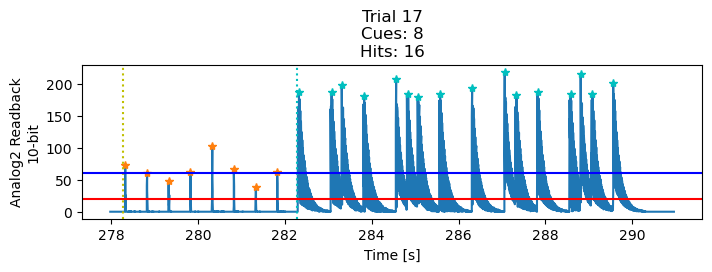

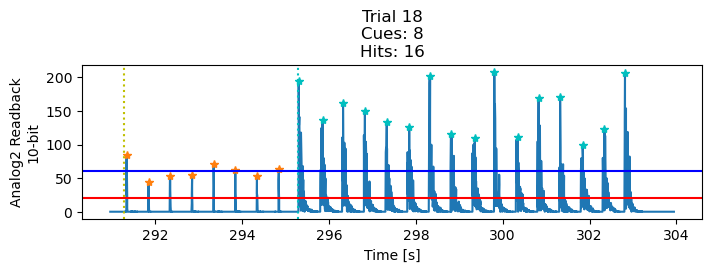

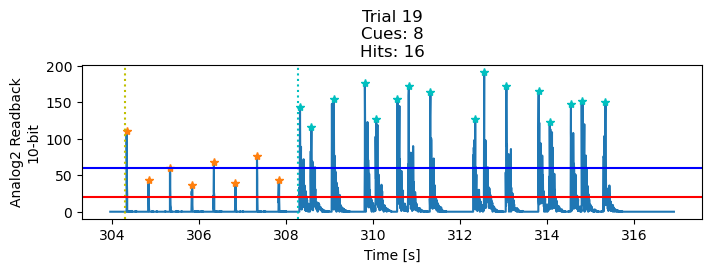

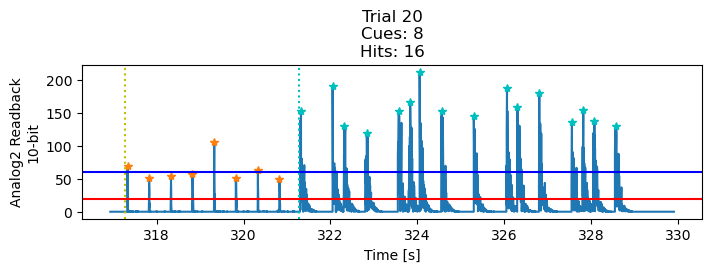

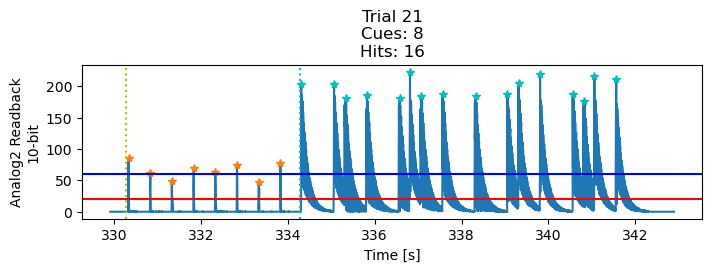

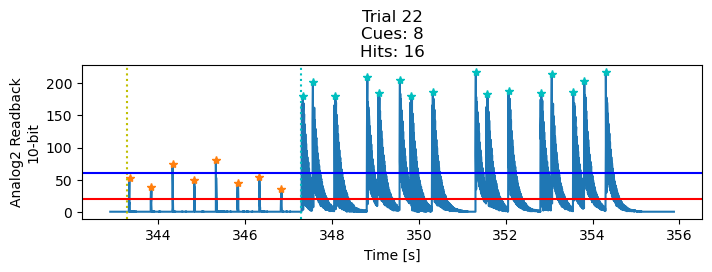

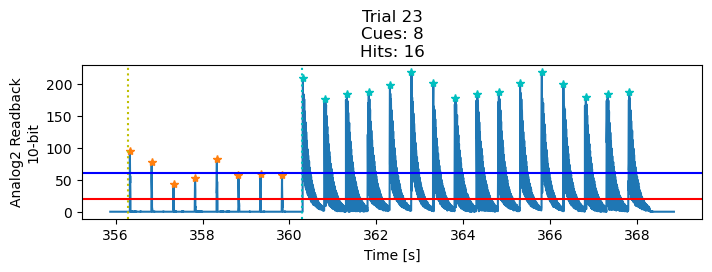

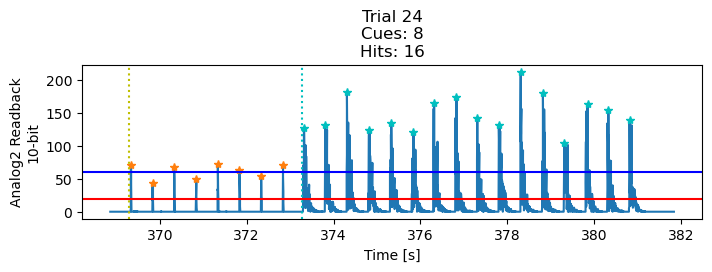

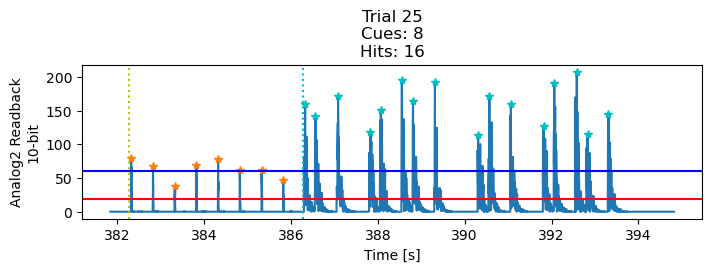

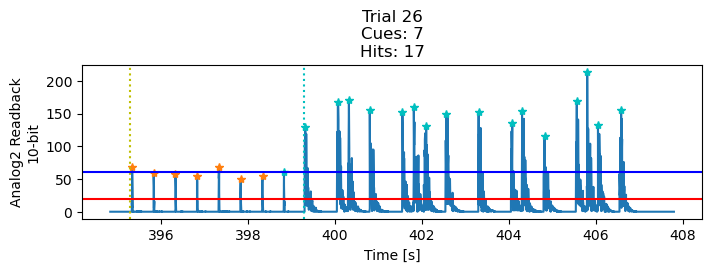

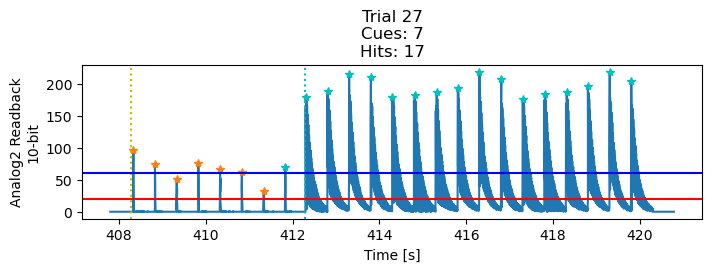

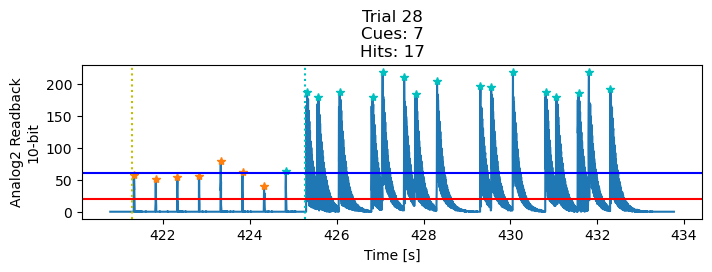

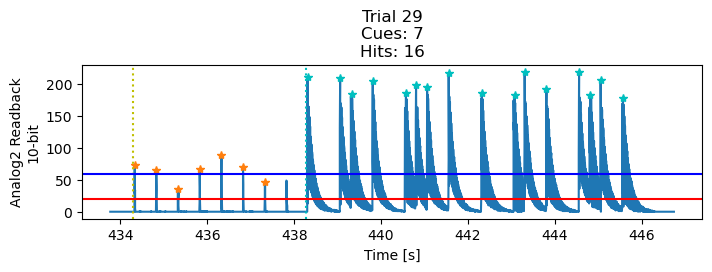

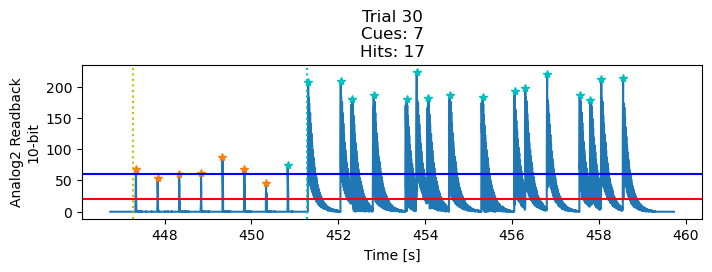

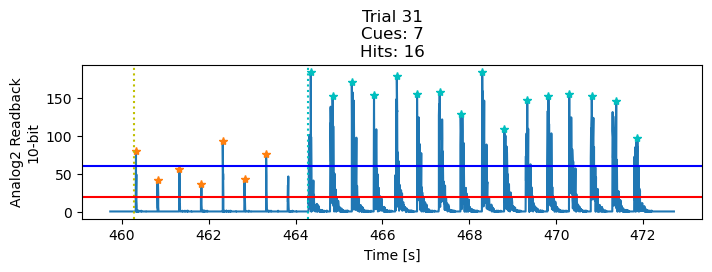

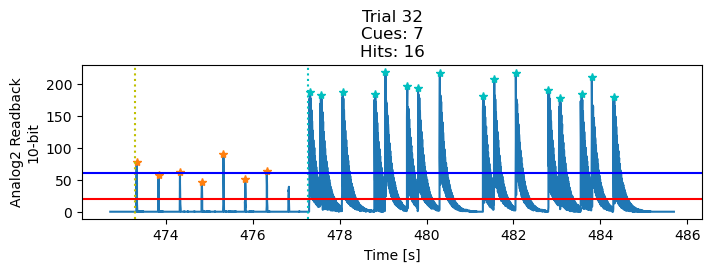

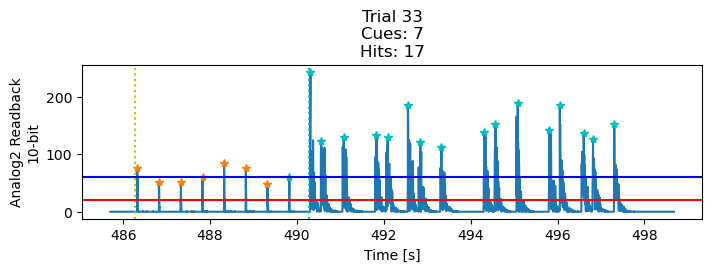

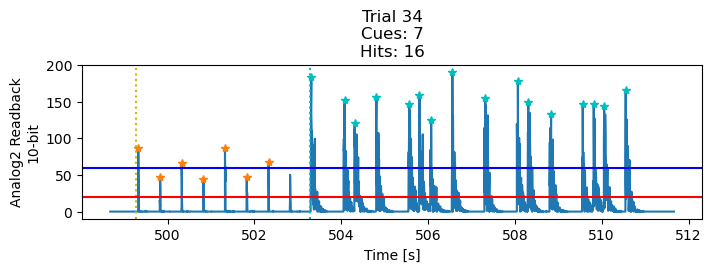

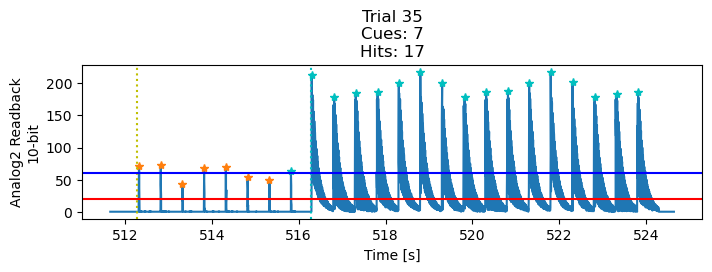

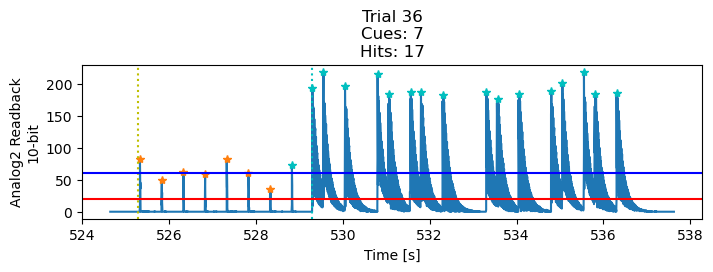

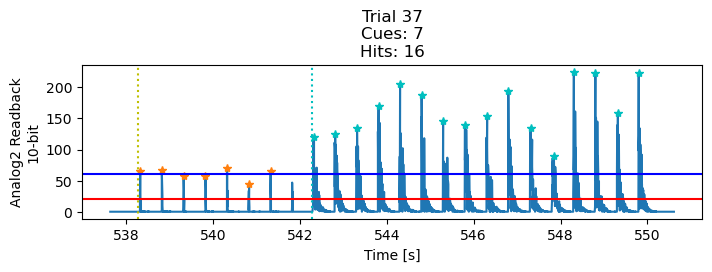

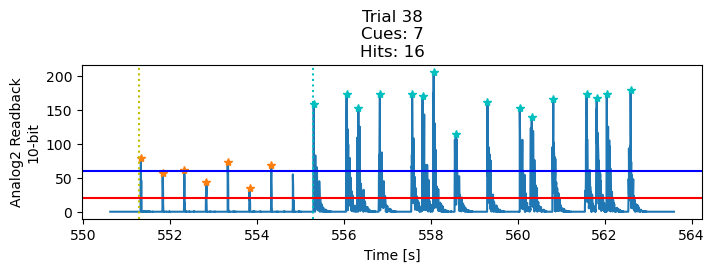

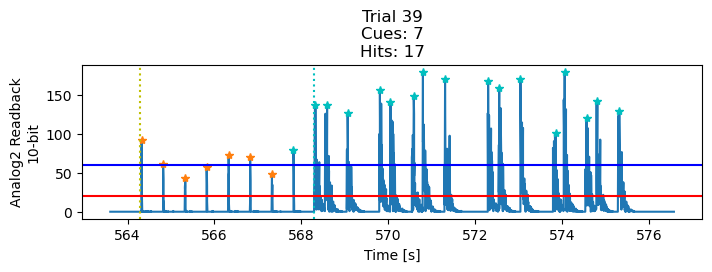

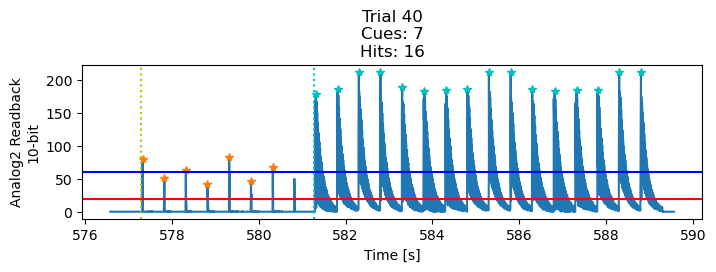

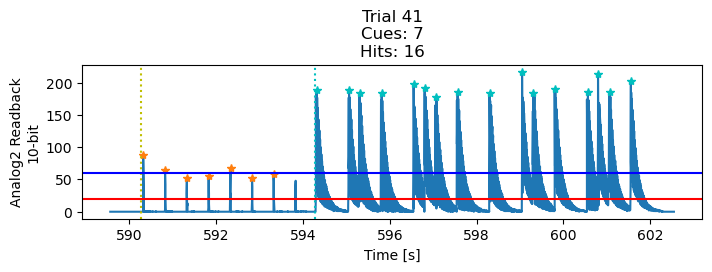

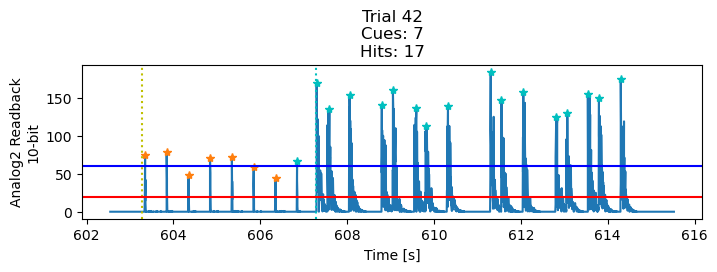

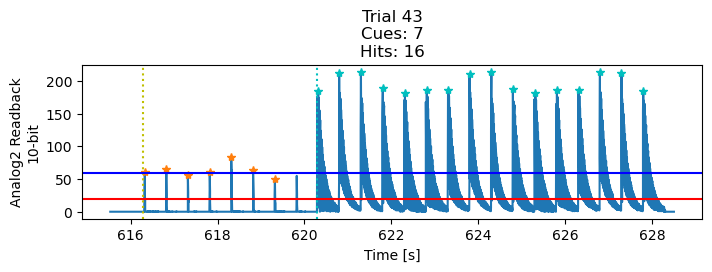

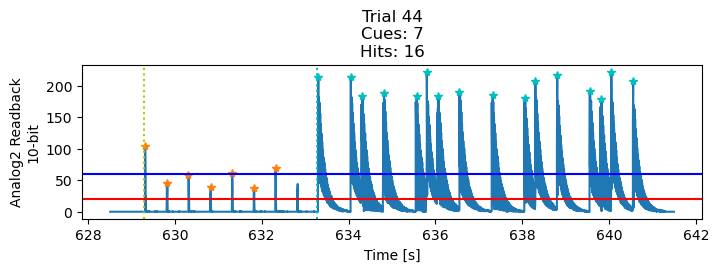

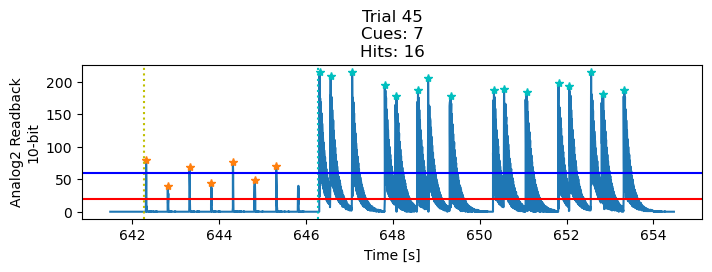

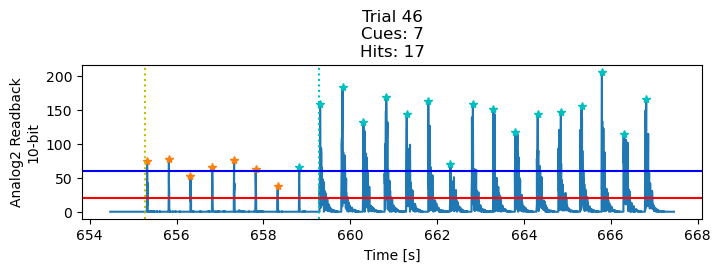

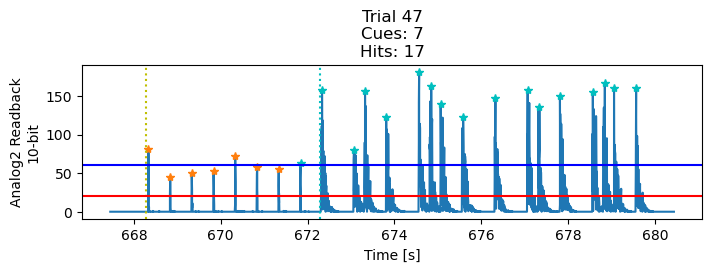

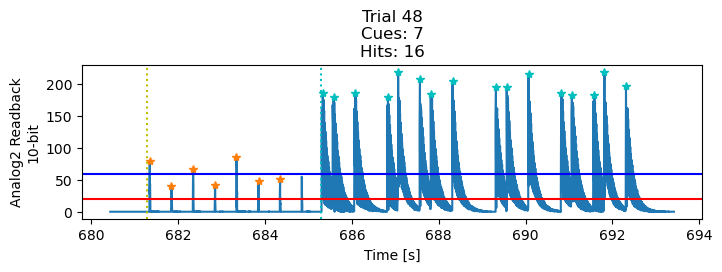

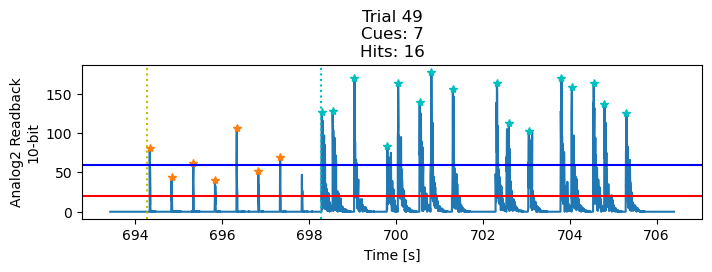

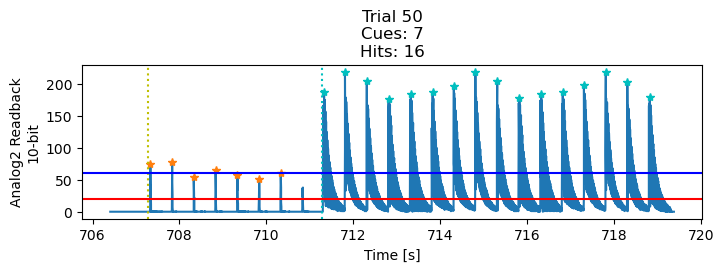

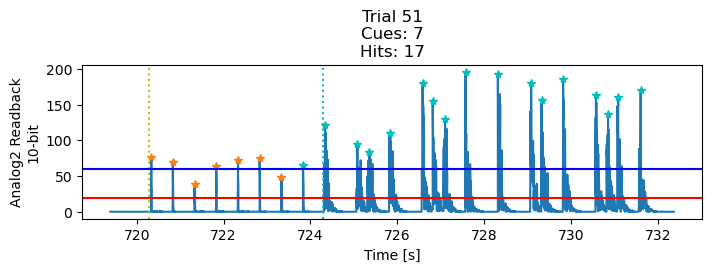

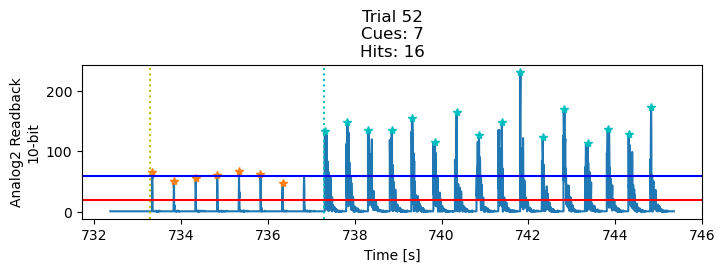

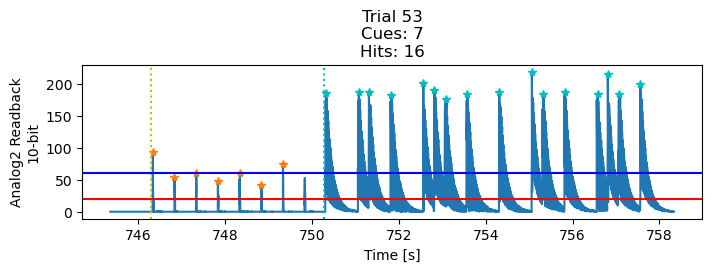

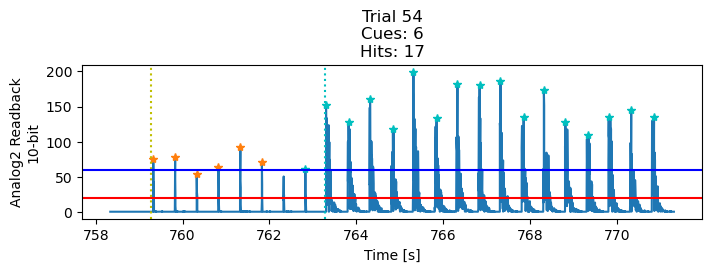

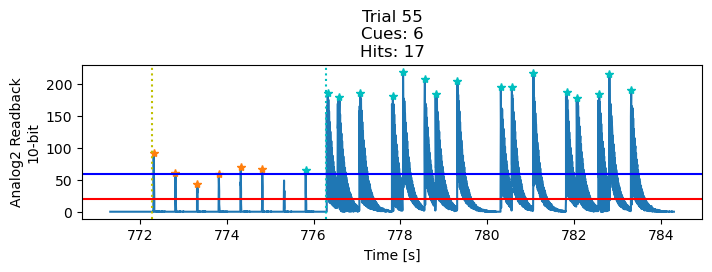

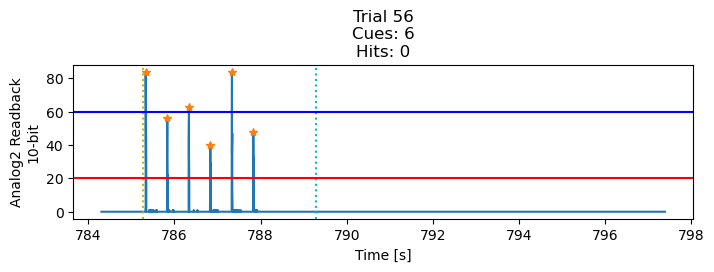

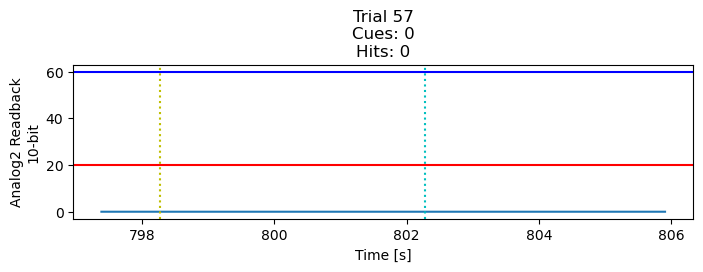

/var/folders/st/wjnxghxn7_b382gv3l4lxt0m0000gn/T/ipykernel_2309/3603215966.py:42: RuntimeWarning: Mean of empty slice.
  analog2 = analog2 - analog2.mean()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


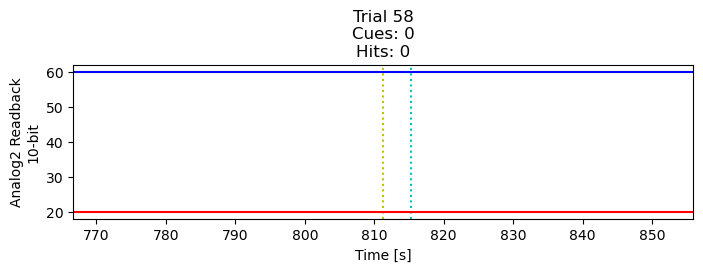

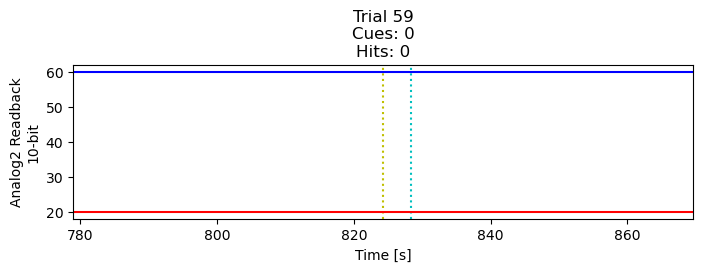

In [7]:
# Find onsets (peaks)
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

# Cyton params
FS_EEG = 250

# PsychoPy params
NUM_CONDITIONS = 2 # kick vs snare
NUM_SYNCOPATIONS = 3 # iso, mp1, mp2
NUM_REPS = 10

CUE_DUR = 4 # seconds
DRUMS_DUR = 8 # seconds
WAIT_DUR = 1 # second

# Hand-tuned peak finding params
CUE_HEIGHT = 20
DRUMS_HEIGHT = 60
IOI_CUE = 0.2 * FS_EEG
IOI_DRUMS = 0.2 * FS_EEG

# Calculated params
period = int(FS_EEG*(CUE_DUR + DRUMS_DUR + WAIT_DUR))
print(period)

num_trials = NUM_CONDITIONS * NUM_SYNCOPATIONS * NUM_REPS
print(num_trials)

START_NDX = int(TARGET_NDX) # make a copy of the exp start index eyeballed above
triggers = {}

for trial in range(num_trials):
    
    # Get sample times (how accurate are these?)
    t = data['Timestamp'].iloc[START_NDX:START_NDX + period]
    t = np.array(t) # make a numpy copy
    t -= data['Timestamp'].iloc[0] # start at t=0 

    # Get corresponding aux channel with audio
    analog2 = data['Analog2'].iloc[START_NDX:START_NDX + period]
    analog2 = np.array(analog2)
    analog2 = analog2 - analog2.mean()
    analog2 = np.abs(analog2) # in case we miss a negative peak

    # Look for peaks in the cue segment
    cue = analog2[:FS_EEG*CUE_DUR] # first four seconds is the metronome
    peaks_cue, _ = find_peaks(
        cue, # only use one of the two channels
        height=CUE_HEIGHT, # the smaller metronome blips also exceed 0.5
        distance=IOI_CUE, # look for a peak in every 100ms, since events would happen every 0.5s @120bpm
    )
    
    # Look for peaks in the drum segment
    drums = analog2[FS_EEG*CUE_DUR:]
    peaks_drums, _ = find_peaks(
        drums, # only use one of the two channels
        height=DRUMS_HEIGHT, # the smaller metronome blips also exceed 0.5
        distance=IOI_DRUMS, # look for a peak in every 100ms, since events would happen every 0.5s @120bpm
    )
    
    peaks_drums += FS_EEG*CUE_DUR # offset by start time
    
    # Collect peaks
    peaks = []
    peaks.extend(peaks_cue)
    peaks.extend(peaks_drums)
    
    # Plot peaks for cue
    plt.figure(figsize=(8,2))
    plt.plot(t, analog2, '-')
    plt.plot(t[peaks_cue], analog2[peaks_cue], '*')
    plt.plot(t[peaks_drums], analog2[peaks_drums], 'c*')
    plt.axvline(x=START_NDX/FS_EEG, c='y', linestyle=':')
    plt.axvline(x=START_NDX/FS_EEG + CUE_DUR, c='c', linestyle=':')
    plt.axhline(y=CUE_HEIGHT, c='r')
    plt.axhline(y=DRUMS_HEIGHT, c='b')
    
    plt.title(f'Trial {trial}\nCues: {len(peaks_cue)}\nHits: {len(peaks_drums)}')
    plt.xlabel('Time [s]')
    plt.ylabel('Analog2 Readback\n10-bit')
    plt.show()
    
    START_NDX += period

In [ ]:
data['Timestamp'].iloc[0]

# Import PsychoPy Logs

In [ ]:
# Grab all data files for that experiment
data_files = glob("../data/" + exp + "/**/OpenBCI*.txt", recursive=True)

# Container for combining data from multiple files
data = pd.DataFrame()

# Subject ID here essentially tracks the file 
subject_ID = 0
for file_path in data_files:
    print(f'Reading {file_path}...')
    
    # Read in one subject's data
    sub_data = pd.read_csv(file_path,
                       delimiter = ',', # BrainFlow files appear to use \t
                       header=4, # row number of col names
                      )
    
    # Append a column with the subject ID (really just a proxy for the file path)
    sub_data['Subject'] = subject_ID
    
    # Concatenate into one dataframe with all files
    data = pd.concat([data, sub_data])
    
    # Increment subject_ID
    subject_ID += 1
    
data

In [ ]:
sampleRate = 250.0
sfreq = 1000
ch_types = []
ch_names = []

num_channels = data.shape[0]
num_eeg = 8
num_aux = 3
num_time = 1
eeg_channel = "eeg"
aux_channel = "stim" #change
time_channel = "misc" #change

for i in range(num_eeg):
    ch_types.append(eeg_channel)
for i in range(num_aux):
    ch_types.append(aux_channel)
for i in range(num_time):
    ch_types.append(time_channel)  

info = mne.create_info(ch_names=list(data.index), sfreq=sfreq, ch_types=ch_types)

In [ ]:
raw = mne.io.RawArray(data, info)
raw

In [ ]:
scalings = {'eeg': 2, 'bio': 1, 'time': 1}

raw.plot(n_channels=11, scalings=scalings, title='test',
         show=True, block=True)


raw.compute_psd().plot(average = False)